In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
tmp = open('data/uniprot/uniprot-proteome_UP000005640.fasta', 'r')
uni_lines = tmp.readlines()
tmp.close()

uni_dic = {'PROTEIN_FULL':[], 'SEQUENCE':[]}
tmp = ''  # initialize
for idx, line in enumerate(uni_lines):
    l = line.replace('\n', '')
    if '>' in l:
        if idx!=0:
            uni_dic['SEQUENCE'].append(tmp)
        uni_dic['PROTEIN_FULL'].append(l)
        tmp = ''  # initialize
    else:
        tmp += l

    if idx + 1 == len(uni_lines):  # end line of db
        uni_dic['SEQUENCE'].append(tmp)

df_uni = pd.DataFrame(uni_dic)

df_uni['PROTEIN'] = [i.replace('>', '').split(' ')[0] for i in df_uni.PROTEIN_FULL.values]
df_uni = df_uni[['PROTEIN', 'SEQUENCE', 'PROTEIN_FULL']]

In [9]:
print(df_uni.shape)
df_uni.head(2)

(75074, 3)


,PROTEIN,SEQUENCE,PROTEIN_FULL
0,sp|Q9H553|ALG2_HUMAN,MAEEQGRERDSVPKPSVLFLHPDLGVGGAERLVLDAALALQARGCS...,">sp|Q9H553|ALG2_HUMAN Alpha-1,3/1,6-mannosyltr..."
1,sp|Q96QF7|ACRC_HUMAN,MDGCKKELPRLQEPEEDEDCYILNVQSSSDDTSGSSVARRAPKRQA...,>sp|Q96QF7|ACRC_HUMAN Acidic repeat-containing...


# EDA

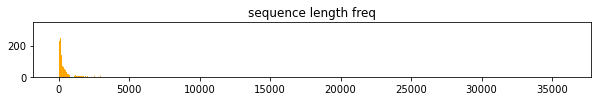

In [14]:
length_viz = {len(i):[] for i in df_uni.SEQUENCE.values}
for i in df_uni.SEQUENCE.values:
    length_viz[len(i)].append(i)

length_viz = {k:len(v) for k, v in length_viz.items()}
tmp = np.array(sorted(list(filter(lambda x: x[1]>=1, length_viz.items())), key=lambda x: x[0], reverse=True))
x = tmp[:, 0]
y = tmp[:, 1]
plt.figure(figsize=(10,1))
plt.bar(x, y, color='orange')
plt.title('sequence length freq')
plt.show()

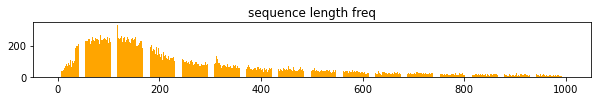

In [16]:
length_viz = {len(i):[] for i in df_uni.SEQUENCE.values}
for i in df_uni.SEQUENCE.values:
    length_viz[len(i)].append(i)

length_viz = {k:len(v) for k, v in length_viz.items()}
tmp = np.array(sorted(list(filter(lambda x: (x[1]>=1) & (x[0]<=1000),
                                  length_viz.items())),
                      key=lambda x: x[0],
                      reverse=True))
x = tmp[:, 0]
y = tmp[:, 1]
plt.figure(figsize=(10,1))
plt.bar(x, y, color='orange')
plt.title('sequence length freq')
plt.show()

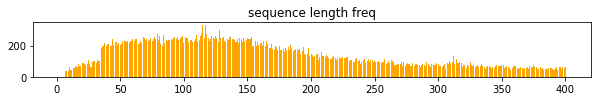

In [17]:
length_viz = {len(i):[] for i in df_uni.SEQUENCE.values}
for i in df_uni.SEQUENCE.values:
    length_viz[len(i)].append(i)

length_viz = {k:len(v) for k, v in length_viz.items()}
tmp = np.array(sorted(list(filter(lambda x: (x[1]>=1) & (x[0]<=400),
                                  length_viz.items())),
                      key=lambda x: x[0],
                      reverse=True))
x = tmp[:, 0]
y = tmp[:, 1]
plt.figure(figsize=(10,1))
plt.bar(x, y, color='orange')
plt.title('sequence length freq')
plt.show()

- SEQUENCE 같고 PROTEIN이 다를 수 있음

In [28]:
dupli_dic = dict()
for s, p in df_uni[['SEQUENCE', 'PROTEIN']].values:
    if s not in dupli_dic:
        dupli_dic[s] = []
    dupli_dic[s].append(p)
dupli_dic = {s:p for s, p in list(filter(lambda x: len(x[1]) > 1, dupli_dic.items()))}

df_dupli_dic = pd.DataFrame([[';'.join(p), s] for s, p in dupli_dic.items()],
                             columns=['PROTEIN', 'SEQUENCE'])
print('duplicated sequence cnt : {:,}'.format(df_dupli_dic.shape[0]))
df_dupli_dic.sort_values('SEQUENCE').head()  # 한 SEQUENCE에 여러 PROTEIN을 ; 로 표시

duplicated sequence cnt : 124


,PROTEIN,SEQUENCE
85,tr|A0A140T8X3|A0A140T8X3_HUMAN;tr|A0A140T990|A...,DFGYCPRVYCENQPMLPIGVLVMVGFTVGKVPVPDIRTCHFCLVED...
67,tr|H0Y6P8|H0Y6P8_HUMAN;tr|A0A140T9C1|A0A140T9C...,DFGYCPRVYCENQPMLPIGVLVMVGFTVGKVPVPDIRTCHFCLVED...
88,tr|A0A140T9P3|A0A140T9P3_HUMAN;tr|A0A140T9T9|A...,FPFAPPGAAAEPHSLRYNLTVLSWDGSVQSGFLAEVHLDGQPFLRY...
123,tr|A0A0J9YXZ3|A0A0J9YXZ3_HUMAN;tr|H0Y7F9|H0Y7F...,GGSAVPSECLDAMEEPDHGALLLLPGRPHPHGQSVITVIGGEEHFE...
80,tr|H0YIL3|H0YIL3_HUMAN;tr|H0YIQ5|H0YIQ5_HUMAN;...,HVIIAFPTSYKVVITLWIVYLWVSLLKTIFWSRNGHDGSTDVQQRA...


# save

In [ ]:
df_uni.to_csv('data/uniprot/df_uni.csv', index=False)